In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sb
# example of oversampling a multi-class classification dataset
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
import numpy as np
from imblearn.over_sampling import SMOTE
log = LogisticRegression()

In [11]:
data = pd.read_csv("donateacry-corpus_features_final.csv")
df = pd.DataFrame(data)

# Drop the first column (column 'A')
df = df.iloc[:, 1:]
df

,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,...,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
0,0,0.028202,0.011050,0.098990,0.102389,1264.335599,519.101121,26.821807,-48.271230,0.082188,...,-15.073559,10.004257,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095
1,0,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,0.101375,...,-10.316871,-0.607061,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785
2,0,0.029967,0.010904,0.116663,0.100042,1546.578200,699.626649,26.594715,-49.541706,0.023605,...,-22.161522,2.070754,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083
3,0,0.027163,0.010520,0.085081,0.140766,1089.415328,668.895951,25.608310,-44.275997,-0.016075,...,-1.704598,0.226281,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483
4,0,0.016663,0.006577,0.067108,0.057629,1017.610932,700.682410,28.196010,-51.325264,0.021112,...,7.812110,-9.098410,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,4,0.036321,0.012994,0.042826,0.460018,613.970520,291.439865,19.730806,-45.207684,0.021832,...,-4.639066,0.584061,-10.853903,3.248470,6.053586,-5.002748,-0.769779,0.259279,-4.109865,-0.197854
453,4,0.006673,0.002049,0.105679,0.021918,1195.248678,438.517237,25.978298,-55.034866,-0.080119,...,-0.379960,12.435725,-7.656326,-5.199711,2.705278,-2.540238,-0.782420,0.764154,-2.904532,0.247652
454,4,0.004490,0.001858,0.115782,0.003234,1447.092259,736.852973,28.304186,-58.661260,0.083645,...,-15.367967,6.072005,-23.269968,-11.039415,3.739090,-9.503819,-7.832272,-6.361354,-13.773407,-6.661149
455,4,0.090113,0.032940,0.105524,0.946393,1305.720324,592.416192,26.528082,-40.918472,-0.023269,...,-14.185391,1.068526,-40.488503,-8.189845,-1.425352,-26.041030,-0.625539,7.053206,-12.801304,-3.918470


In [18]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

In [ ]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_sample(df_train.drop('Is_Lead', axis=1), df_train['Is_Lead'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class=0, n=382 (20.000%)
Class=1, n=382 (20.000%)
Class=2, n=382 (20.000%)
Class=3, n=382 (20.000%)
Class=4, n=382 (20.000%)


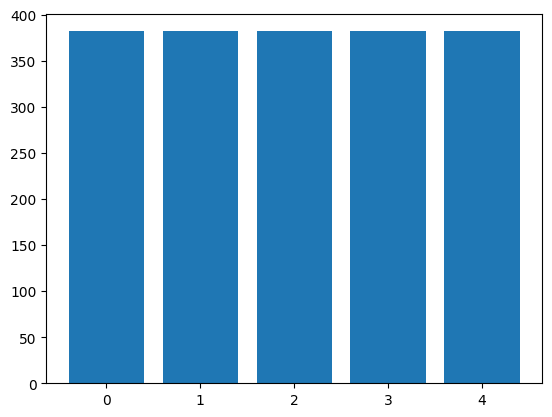

In [19]:
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [39]:
# Splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35)

In [40]:
X_train

,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,del2MFCCs13,...,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
1752,0.009940,0.003630,0.106519,0.045418,1192.527488,605.936148,27.673156,-49.705036,-0.025662,-0.001670,...,12.358948,2.926410,-21.331305,-16.082177,-11.726387,-16.578405,-11.162047,-10.399137,-10.825885,-3.078137
1812,0.004107,0.001705,0.129435,0.003480,1552.496502,674.545660,28.307495,-58.393681,0.074429,-0.005075,...,-8.378321,9.223760,-20.645086,-10.868017,1.923647,-9.593094,-6.418552,-4.170481,-10.897649,-4.815152
175,0.016753,0.006608,0.074374,0.073581,1097.241312,576.144538,24.733534,-46.443016,0.061554,0.006383,...,-6.237235,1.273509,-16.837301,-2.367307,4.033438,-6.427815,-2.683412,-2.854779,-5.782337,0.563855
790,0.006400,0.002341,0.102742,0.011107,1259.416972,603.075340,28.246116,-57.115035,0.041256,0.019519,...,-9.909445,2.843880,-16.910498,-8.236221,-6.975877,-13.823248,-3.487460,-6.398941,-12.017536,-2.683061
568,0.013718,0.005527,0.084509,0.047615,1056.271598,569.933131,27.483852,-50.666475,-0.041635,-0.001494,...,-2.174768,-2.122815,-19.809308,-11.035358,-12.460987,-18.992869,-8.412881,-9.846994,-13.517702,-4.455857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.029202,0.010967,0.108998,0.101060,1424.169554,621.332708,26.693205,-48.990700,0.049013,0.010357,...,-19.087472,5.511515,-28.155683,-6.273246,8.175155,-13.424304,-6.612681,1.007524,-8.681324,-5.589806
1813,0.001270,0.000480,0.120932,0.000524,1415.282161,660.682413,26.694970,-63.458354,0.107750,-0.000095,...,4.873124,10.189412,-9.526979,-0.171472,3.345361,-6.268947,0.738033,0.533424,-8.097707,-1.887006
1499,0.029569,0.012078,0.064823,0.199435,862.679145,549.463847,27.904653,-38.802444,0.052264,0.022580,...,1.949539,3.318528,-20.264083,-9.018912,-1.547281,-9.570582,0.045152,1.759728,-8.683353,-3.303194
238,0.061142,0.023377,0.105127,0.476429,1464.442475,692.973900,29.067052,-42.968240,-0.002274,0.001766,...,-15.220715,13.067082,-29.311823,-20.137571,-3.017966,-8.893559,6.198007,1.770889,-21.343721,-6.205124
